In [2]:
#https://madewithml.com/courses/foundations/linear-regression/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
SEED  =1234 #Seed for generating same sample again
NUM_SAMPLES = 50 #Number of samples

In [3]:
#set seed for reponsibility
np.random.seed(SEED)


In [3]:
#Generating the Data
def generate_data(num_samples):
    X  = np.array(range(num_samples))
    noise  = np.random.uniform(-10,20,size=num_samples)
    y = 3.5*X + noise
    return X,y

    

In [4]:
X,y = generate_data(num_samples=NUM_SAMPLES)
data = np.vstack([X,y]).T

In [51]:
print(data[:5])
df = pd.DataFrame(data, columns=['X','y'])
X=df[['X']].values
y=df[['y']].values
df.head()
#Load 

[[ 0.         -7.13337784]
 [ 1.         16.7108868 ]
 [ 2.         16.67675671]
 [ 3.         17.45403327]
 [ 4.         26.77583246]]


,X,y
0,0.0,-7.133378
1,1.0,16.710887
2,2.0,16.676757
3,3.0,17.454033
4,4.0,26.775832


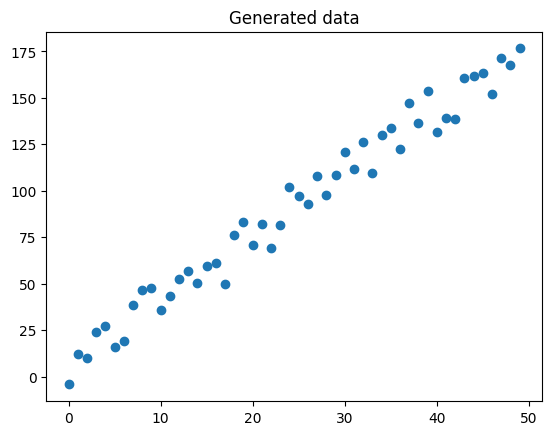

In [7]:
# Scatter plot
plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.show()

In [8]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [9]:
# Shuffle data
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [10]:
# Split indices
train_start = 0
train_end = int(0.7*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
test_start = val_end

In [11]:
# Split data
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = y[test_start:]
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_test: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (35, 1), y_train: (35, 1)
X_val: (7, 1), y_test: (7, 1)
X_test: (8, 1), y_test: (8, 1)


Standardizing the DATA

In [12]:
def standardize_data(data, mean, std):
    return (data - mean)/std

# Determine means and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

In [13]:
# Standardize
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

In [14]:
# Check (means should be ~0 and std should be ~1)
# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: -0.6, std: 0.9
mean: -0.6, std: 0.9


In [15]:
print(X_train.shape)
X_train.shape[1]

(35, 1)


1

In [16]:
X_train

array([[-0.33640164],
       [-1.6820082 ],
       [ 0.94192459],
       [-1.41288689],
       [-0.94192459],
       [ 1.14376557],
       [-1.27832623],
       [-1.07648525],
       [ 0.20184098],
       [-0.20184098],
       [ 1.00920492],
       [-0.74008361],
       [-0.53824262],
       [ 1.2110459 ],
       [-1.00920492],
       [ 0.        ],
       [ 1.27832623],
       [ 0.67280328],
       [-1.74928853],
       [ 0.13456066],
       [ 0.80736393],
       [-1.2110459 ],
       [ 1.48016721],
       [ 0.33640164],
       [ 1.07648525],
       [ 0.53824262],
       [ 0.40368197],
       [-0.67280328],
       [ 0.26912131],
       [ 1.34560656],
       [ 0.87464426],
       [ 1.41288689],
       [-0.40368197],
       [-0.06728033],
       [-1.81656885]])

In [17]:
# PROCESS  ->  
# Intialize w and b
# Find the prediction -> choose the loss function and calculate it -> find gradient of loss with both w and b -> Update w and b  -> Run everything for n epochs
# We only have one feature here and 35 samples so shape of train data will be (35,1) . To multiply it with weights we have to generate weights having shape (1,1)
#

INPUT_DIM = X_train.shape[1]  
OUTPUT_DIM = y_train.shape[1]
W = 0.01 * np.random.randn(INPUT_DIM,OUTPUT_DIM)
b= np.zeros((1,1))




In [18]:
print(W, W.shape)
print(b, b.shape)

[[0.00704228]] (1, 1)
[[0.]] (1, 1)


In [21]:
###Training

NUM_EPOCHS  =100
LEARNING_RATE = 1e-1

#Intializating W and b

W = 0.01*np.random.rand(INPUT_DIM,OUTPUT_DIM)
B = np.zeros((1,1))


for n_epochs in range(NUM_EPOCHS):

    y_pred  = np.dot(X_train, W) + B

    loss =   (1/ len(y_train)) * np.sum((y_pred - y_train)**2)

    # Show progress
    if n_epochs%10 == 0:
        print(f"Loss at epoch {n_epochs} is {loss}\n")

    dw  = -(2/len(y_train))*np.sum((y_train-y_pred)*X_train)
    db = -(2/len(y_train))*np.sum((y_train-y_pred) *1)

    #updated weights

    W  = W - LEARNING_RATE*dw
    B = B - LEARNING_RATE*db























Loss at epoch 0 is 0.9969940888873408

Loss at epoch 10 is 0.039294920166064284

Loss at epoch 20 is 0.02825340050043569

Loss at epoch 30 is 0.028126100445775265

Loss at epoch 40 is 0.028124632776069705

Loss at epoch 50 is 0.028124615854990057

Loss at epoch 60 is 0.028124615659903287

Loss at epoch 70 is 0.02812461565765409

Loss at epoch 80 is 0.028124615657628162

Loss at epoch 90 is 0.02812461565762786



In [23]:
# Predictions
pred_train = W*X_train + b
pred_test = W*X_test + b

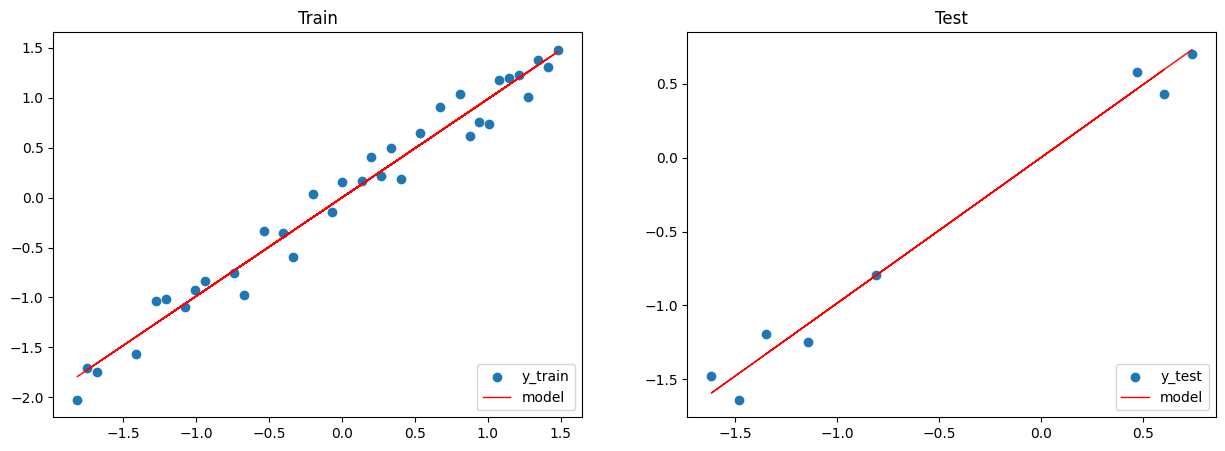

In [24]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Show plots
plt.show()

PYTORCH

In [ ]:
import torch 

#set seed for reproducibility
torch.manual_seed(SEED)





In [6]:
# splitting the data
from sklearn.model_selection import train_test_split

TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

# Split (train)
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=TRAIN_SIZE)

print (f"train: {len(X_train)} ({(len(X_train) / len(X)):.2f})\n"
       f"remaining: {len(X_)} ({(len(X_) / len(X)):.2f})")

train: 35 (0.70)
remaining: 15 (0.30)


In [7]:
# Split (test)
X_val, X_test, y_val, y_test = train_test_split(
    X_, y_, train_size=0.5)

print(f"train: {len(X_train)} ({len(X_train)/len(X):.2f})\n"
      f"val: {len(X_val)} ({len(X_val)/len(X):.2f})\n"
      f"test: {len(X_test)} ({len(X_test)/len(X):.2f})")

train: 35 (0.70)
val: 7 (0.14)
test: 8 (0.16)


In [8]:
from sklearn.preprocessing import StandardScaler

# Standardize the data (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Apply scaler on training and test data
X_train = X_scaler.transform(X_train)
y_train = y_scaler.transform(y_train).ravel().reshape(-1, 1)
X_val = X_scaler.transform(X_val)
y_val = y_scaler.transform(y_val).ravel().reshape(-1, 1)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test).ravel().reshape(-1, 1)


# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")




mean: 0.3, std: 0.7
mean: 0.2, std: 0.7


In [10]:

INPUT_DIM = X_train.shape[1]   #1
OUTPUT_DIM = y_train.shape[1]  #1

In [14]:
#Model
from torch import nn
import torch

class LinearRegression(nn.Module):
    def __init__(self,input_dim, output_dim):
        super(LinearRegression,self).__init__()
        self.fc1 = nn.Linear(input_dim,output_dim)

    def forward(self,x_in):
        y_pred = self.fc1(x_in)
        return y_pred


    

In [12]:
# Initialize model
model = LinearRegression(input_dim=INPUT_DIM, output_dim=OUTPUT_DIM)
print (model.named_parameters)

<bound method Module.named_parameters of LinearRegression(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)>


In [15]:
#Loss dummy using pytorch
loss_fn = nn.MSELoss()
y_pred = torch.Tensor([0., 0., 1., 1.])
y_true =  torch.Tensor([1., 1., 1., 0.])
loss = loss_fn(y_pred, y_true)
print("Loss: ", loss.numpy())

Loss:  0.75


In [17]:
#Using Optimizer instead of batch gradient descent

from torch.optim import Adam
# Optimizer
LEARNING_RATE = 1e-1
optimizer = Adam(model.parameters(), lr=LEARNING_RATE)

In [18]:
#Training

# Convert data to tensors
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)
X_val = torch.Tensor(X_val)
y_val = torch.Tensor(y_val)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)


In [19]:
print(model)

LinearRegression(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)


In [27]:
# Training

NUM_EPOCHS  =100
for epoch in range(NUM_EPOCHS):
    # Forward pass
    y_pred = model.forward(X_train)

    # Loss
    loss = loss_fn(y_pred, y_train)

    # Zero all gradients
    optimizer.zero_grad() #Done before back prop

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    if epoch%20==0:
        print (f"Epoch: {epoch} | loss: {loss:.2f}")

Epoch: 0 | loss: 0.50
Epoch: 20 | loss: 0.04
Epoch: 40 | loss: 0.03
Epoch: 60 | loss: 0.03
Epoch: 80 | loss: 0.03


In [48]:
# Inference
# Feed in your own inputs
sample_indices = [10, 15, 25]
X_infer = np.array(sample_indices, dtype=np.float32)
print(X_infer)

X_infer = torch.Tensor(X_scaler.transform(X_infer.reshape(-1, 1)))
print(X_infer)



[10. 15. 25.]
[24.25714286]
tensor([[-0.9530],
        [-0.6188],
        [ 0.0497]])


In [52]:
# Unstandardize predictions
pred_infer = model(X_infer).detach().numpy() * np.sqrt(y_scaler.var_) + y_scaler.mean_ 


for i, index in enumerate(sample_indices):
    print(f"{df.iloc[index]['y']:.2f} (actual) → {pred_infer[i][0]:.2f} (predicted)")


54.83 (actual) → 41.48 (predicted)
48.63 (actual) → 58.60 (predicted)
105.04 (actual) → 92.84 (predicted)


REGULARIZATION

Regularization helps decrease overfitting. Below is L2 regularization (ridge regression). There are many forms of regularization but they all work to reduce overfitting in our models. With L2 regularization, we are penalizing large weight values by decaying them because having large weights will lead to preferential bias with the respective inputs and we want the model to work with all the inputs and not just a select few. There are also other types of regularization like L1 (lasso regression) which is useful for creating sparse models where some feature coefficients are zeroed out, or elastic which combines L1 and L2 penalties.

In PyTorch, we can add L2 regularization by adjusting our optimizer. The Adam optimizer has a weight_decay parameter which to control the L2 penalty.

In [55]:
L2_LAMBDA = 1e-2


In [56]:
# Initialize model
model = LinearRegression(input_dim=INPUT_DIM, output_dim=OUTPUT_DIM)

In [57]:
# Optimizer (w/ L2 regularization)
optimizer = Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=L2_LAMBDA)

Rest remains same